Task 1: We refer to the principal components of face image datasets as eigenfaces. Display
the frst 28 eigenfaces of this dataset. (They will have little resemblance to the frst 28
images displayed above.)

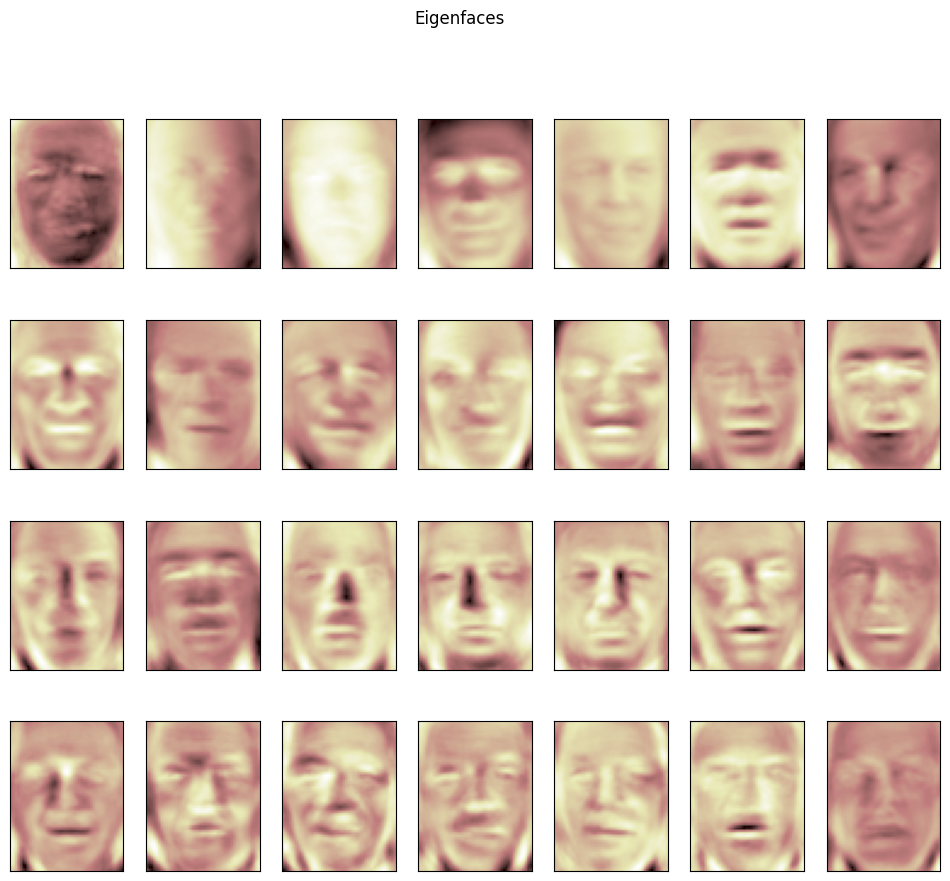

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

# Fetch the LFW dataset
faces = fetch_lfw_people(min_faces_per_person=60)

# Number of principal components (eigenfaces) to compute
n_components = 28

# Create a PCA instance and fit it to the faces dataset
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(faces.data)

# Extract the eigenfaces from the PCA components
eigenfaces = pca.components_.reshape((n_components, faces.images.shape[1], faces.images.shape[2]))

# Create a plot to display the eigenfaces
fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(eigenfaces[i], cmap='pink')
    axi.set(xticks=[], yticks=[])

plt.suptitle('Eigenfaces')
plt.show()

Task 2: Let N be the least number of dimensions to which can you reduce the dataset
without exceeding 5% relative error in the Frobenius norm. Find N. (This requires you
to combine what you learnt in the SVD lecture on the Frobenius norm of the error in best
low-rank approximation with what you just learnt in the PCA lecture.)

In [ ]:
# Step 1: Calculate the Frobenius norm of the original data
original_data = faces.data
frobenius_norm_original = np.linalg.norm(original_data, 'fro')

# Step 2: Perform PCA on a smaller subset to find N
pca = PCA(svd_solver='randomized', whiten=True).fit(original_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
N = np.argmax(cumulative_variance >= 0.95) + 1

# Step 3: Perform PCA on the entire dataset
pca_full = PCA(n_components=N, svd_solver='randomized', whiten=True).fit(original_data)

# Step 4: Reconstruct data using the first N principal components
reconstructed_data = pca_full.inverse_transform(pca_full.transform(original_data))

# Step 5: Calculate the Frobenius norm of the reconstruction
frobenius_norm_reconstruction = np.linalg.norm(reconstructed_data - original_data, 'fro')

# Step 6: Calculate the relative error
relative_error = frobenius_norm_reconstruction / frobenius_norm_original

print("The least number of dimensions (N) to maintain a 5% relative error in Frobenius norm is:", N)

The least number of dimensions (N) to maintain a 5% relative error in Frobenius norm is: 184


Task 3: Repeat PCA, restricting to N eigenfaces (with N as in Task 2), holding back the last
seven images in the dataset. Compute the representations of these last seven images in
terms of the N eigenfaces. How do they compare visually with the original seven images?

In [ ]:

N = 184

# Load the original dataset (excluding the last 7 images)
original_data = faces.data[:-7]

# Perform PCA with N components
pca = PCA(n_components=N, svd_solver='randomized', whiten=True).fit(original_data)

# Extract the N eigenfaces
eigenfaces = pca.components_.reshape((N, faces.images.shape[1], faces.images.shape[2]))

# Load the last 7 images in the dataset
last_seven_images = faces.data[-7:]

# Compute representations of the last 7 images in terms of the N eigenfaces
representations = pca.transform(last_seven_images)

# Reconstruct the images from representations
reconstructed_images = pca.inverse_transform(representations)

# Plot the original and reconstructed images
fig, ax = plt.subplots(2, 7, figsize=(12, 5))
for i in range(7):
    ax[0, i].imshow(faces.images[-7 + i], cmap='pink')
    ax[0, i].set(xticks=[], yticks=[])

for i in range(7):
    ax[1, i].imshow(reconstructed_images[i].reshape(faces.images.shape[1], faces.images.shape[2]), cmap='pink')
    ax[1, i].set(xticks=[], yticks=[])

plt.suptitle('Original Images (Top) vs. Reconstructed Images (Bottom)')
plt.show()

Task 4: Restricting to only images of Ariel Sharon and Hugo Chavez, represent (and plot)
them as points on a three-dimensional space whose axes represent the principal axes 4, 5,
and 6. Do you see the points somewhat clustered in two groups? (The principal directions
0, 1, 2, 3 are excluded in this task since they seem to refect lighting, shadows, and generic
facial features, so will likely not be useful in delineating individuals.)

In [ ]:
# Define the restricted names for Ariel Sharon and Hugo Chavez
target_names = ['Ariel Sharon', 'Hugo Chavez']

# Filter the dataset to include only images of Ariel Sharon and Hugo Chavez
filtered_indices = [i for i, target in enumerate(faces.target) if faces.target_names[target] in target_names]
filtered_data = faces.data[filtered_indices]

# Perform PCA on the filtered dataset
pca = PCA(n_components=7, svd_solver='randomized', whiten=True).fit(filtered_data)

# Use the principal components corresponding to axes 4, 5, and 6
principal_axes = pca.transform(filtered_data)[:, 4:7]

# Plot the images as points in a three-dimensional space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(principal_axes[faces.target[filtered_indices] == i, 0],
                principal_axes[faces.target[filtered_indices] == i, 1],
                principal_axes[faces.target[filtered_indices] == i, 2],
                color=color, alpha=.8, lw=lw,
                label=target_name)

ax.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("PCA of Ariel Sharon and Hugo Chavez")
plt.show()